In [14]:
from observatorio_laboral.offer.offer_controller import OfferController
from observatorio_laboral.offer.date_range import DateRange

text_fields = ["Job Title"]
oc = OfferController(text_fields, keyspace="l4", table="l4_offers")
date_range = DateRange(1, 2016, 7, 2017)
source = "symplicity"

oc.load_offers(source, date_range)
print("Nro de conv. en la fecha ingresada: ", len(oc.offers))

oc.filter_offers_by_career("ECONOMÍA")
print("Nro de conv. de la carrera: ", len(oc.offers))

Nro de conv. en la fecha ingresada:  1801
Nro de conv. de la carrera:  1801


In [15]:
from observatorio_laboral.keywords_classifier.keywords_classifier import KeywordClassifier

features = []
for offer in oc.offers:
    features.append(offer.features)    

kwc = KeywordClassifier("proc_symplicity.txt")
kwc.read_configuration()
kwc.load_keywords()

results = kwc.run(features)

In [16]:
filtered_offers = []
filtered_results = []
for offer, result in zip(oc.offers, results):
    if 'practicante' not in result['positions']:
        filtered_offers.append(offer)
        filtered_results.append(result)
        
oc.offers = filtered_offers
results = filtered_results
len(filtered_offers)
    

1325

In [28]:
import numpy as np

def predict(classifiers, mlb, X_test):
    class_y_pred_binary = {}
    class_labels = np.zeros(shape=(len(X_test), len(mlb.classes_)))
    class_probs = np.zeros(shape=(len(X_test), len(mlb.classes_)))
    
    for idx, label in enumerate(mlb.classes_):        
        class_y_pred_binary[label] = classifiers[label].predict(X_test)
        L = classifiers[label].predict_proba(X_test)[:,1]
        class_probs[:, idx] = L
        L[L>=0.5] = 1
        L[L<0.5] = 0
        class_labels[:, idx] = L
        
    return class_labels, class_probs

In [18]:
import pickle

with open("Pickle/classifiersEconomia.p", "rb") as file:
    classifiers = pickle.load(file)
with open("Pickle/binarizerEconomia.p", "rb") as file:
    mlb = pickle.load(file)


In [29]:
oc.text_fields = ["Job Title", "Description", "Qualifications"]
X = oc.get_text()
X[0]

'Administrador de Contratos Objetivo del Puesto:\r\n- Incrementar el valor del negocio de metales mediante la eficiente ejecución de los acuerdos comerciales pectados, liquidaciones, controles, seguimientos e interacción con proveedores y clientes. \r\n- Proveer un abastecimiento ordenado y fluido de información y reportes hacia las dependencias y clientes internos.\r\n\r\nFunciones:\r\n- Ejecución de contratos, liquidaciones, calidades, tiempos, volúmenes. \r\n- Nominaciones de servicios involucrados: análisis, supervisión, operadores logísticos, dirimencias, almacén, etc.\r\n- Generación, coordinación y revisión de costos de servicios.\r\n- Evaluación de riesgo: exposiciones por provisionales, financiamientos, posiciones abiertas.\r\n- Control de finos totales, finos pagables, nominaciones y fijaciones de precios.\r\n- Declaración de QP o fijación de precios, cálculo de contenidos pagables para dichos propósitos.\r\n- Solicitud, instrucción y conciliación de egresos compras, egresos 

In [30]:
y_labs, y_probs = predict(classifiers, mlb, X)

In [32]:
for l, p in zip(y_labs, y_probs):
    print(l)

[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  

[ 0.  0.  1.  1.  1.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  1.  0.  0.  1.  0.]
[ 0.  0.  

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import nltk
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
# Functions to visualize word vector information
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25, func=np.mean):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    #tfidf_means = np.nanmean(np.where(matrix!=0,matrix,np.nan),1)
    #tfidf_means = np.mean(D, axis=0)
    #tfidf_means = np.sum(D, axis=0)
    tfidf_means = func(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = {}
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)          
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs[label] = feats_df        
    return dfs

def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))    
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.gca().invert_yaxis()
    plt.show()
    
    
# Hamming score
def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    https://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        #print('\nset_true: {0}'.format(set_true))
        #print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)    


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Load reviewed vocabulary
vocab = set()
with open("diccionarioEconomia.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        word = row['Concepto']
        mark = row['Economía']
        
        if mark == 's':
            vocab.add(word)
            
vocab = list(vocab)
print("Tamaño del vocabulario: ", len(vocab))

vec = TfidfVectorizer(vocabulary=vocab, ngram_range=(1,4))
Xtr = vec.fit_transform(X)
features = vec.get_feature_names()

dfs = {}
for idx, label in enumerate(mlb.classes_):
    class_y_binary = y_labs[:,idx]
    ids = np.where(class_y_binary==1)
    
    if len(ids[0]) > 0:
        df = top_mean_feats(Xtr, features, ids, top_n=20, func=np.mean)
        dfs[label] = df        

Tamaño del vocabulario:  3254


In [95]:
import csv

with open("Resultados/Perfiles.csv", "w") as csvfile:
    fieldnames = ["Perfil", "palabras"]
    writer = csv.DictWriter(csvfile, fieldnames= fieldnames)
    writer.writeheader()
    for label, df in dfs.items():        
        for word in df.feature:        
            writer.writerow({
                'Perfil': label,
                'palabras' : word
            })

In [78]:
df.label = "FI"

In [80]:
df.feature


0              proyectos
1             desarrollo
2               análisis
3                empresa
4            presupuesto
5            seguimiento
6               proyecto
7           planeamiento
8            indicadores
9                 costos
10            financiero
11           financieros
12                gastos
13    control de gestión
14              acciones
15          presupuestos
16               compras
17            estrategia
18               cuentas
19              finanzas
Name: feature, dtype: object

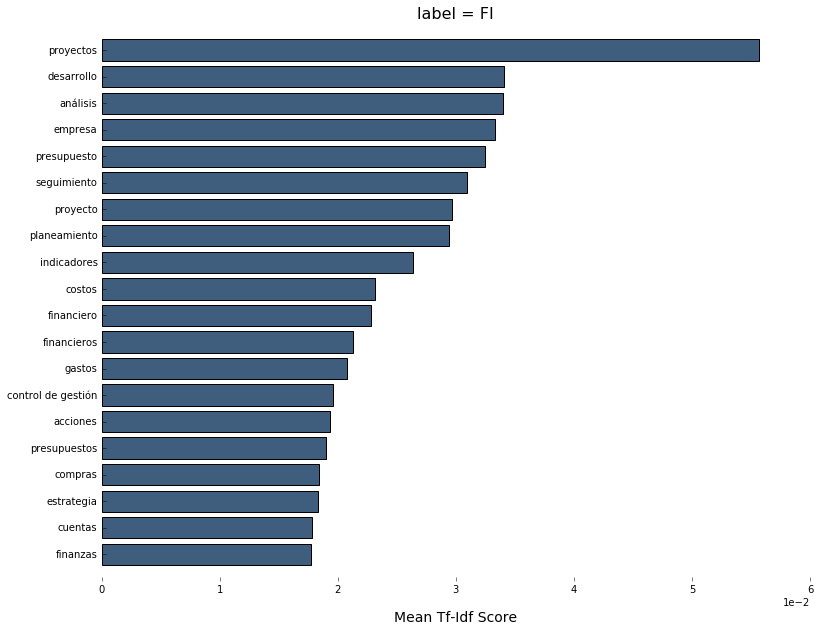

In [85]:
plot_tfidf_classfeats_h([df])

In [47]:
cruces = np.zeros(shape=(len(mlb.classes_), len(mlb.classes_)))
labels = {}
for idx, label in enumerate(mlb.classes_):
    labels[label] = y_labs[:,idx]

for i1, v1 in enumerate(labels.values()):
    for i2, v2 in enumerate(labels.values()):
        
        cruces[i1, i2] = np.sum(np.logical_and(v1,v2))
        
    
        
        

In [50]:
labels

{'EI': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'EM': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'FI': array([ 1.,  1.,  1., ...,  1.,  0.,  1.]),
 'MC': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'OI': array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 'PP': array([ 1.,  0.,  1., ...,  0.,  0.,  1.]),
 'TE': array([ 0.,  0.,  0., ...,  0.,  0.,  0.])}

In [48]:
cruces

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,   16.,    0.,    0.,    0.,   10.,   12.],
       [   0.,    0.,   45.,    2.,    0.,   17.,   21.],
       [   0.,    0.,    2.,    5.,    0.,    2.,    1.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,   10.,   17.,    2.,    0.,  806.,  470.],
       [   0.,   12.,   21.,    1.,    0.,  470.,  857.]])

In [33]:
len(y_labs)


1325

In [4]:
import csv

with open("DataFiltrada/Economia.csv", "w") as csvfile:    
    fieldnames = ["id", "year", "month", "Job Title", "Description",
                  "Qualifications", "Organization Name", "Majors/Concentrations",
                  "Software", "Position Level",]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for offer in oc.offers:
        writer.writerow({
            'id' : offer.id,
            'year' : offer.year,
            'month' : offer.month,
            'Job Title' : offer.features['Job Title'],
            'Description' : offer.features['Description'],
            'Qualifications' : offer.features['Qualifications'],
            'Organization Name' : offer.features['Organization Name'],
            'Software' : offer.features['Software'],
            'Majors/Concentrations' : offer.features['Majors/Concentrations'],
            'Position Level' : offer.features['Position Level'],
        })
    

In [32]:
l4_count = {}
for result in results:
    for field in result:
        if field not in l4_count:
            l4_count[field] = {}
            
        for label in result[field]:        
            if label not in l4_count[field]:
                l4_count[field][label] = 0
            
            l4_count[field][label] += 1
        
import csv
for field in l4_count:
    with open("Resultados/Economia/" + field + ".csv", 'w') as csvfile:
        fieldnames = [field, 'nro_conv']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for label, count in l4_count[field].items():
            writer.writerow({field : label, 'nro_conv' : count})

In [33]:
for offer, result in zip(oc.offers, results):
    if 'Otros/no-menciona' in result['degrees']:
        print(offer.features)


{'Additional languages': '', 'Approved': 'Sí', 'Beneficios e información adicional': '- Cobertura EPS.\r\n- Planilla.\r\n- Utilidades.\r\n- Línea de Carrera.', 'Degree Level': '', 'Description': 'Asegurar la racionalidad, unidad y eficiencia de los procesos administrativos y financieros para cubrir las necesidades de la organización.\r\n\r\nFUNCIONES:\r\n\r\n• Elaborar y hacer seguimiento del presupuesto anual.\r\n• Dirigir los recursos financieros de ejecución del gasto asignados a la organización.\r\n• Efectuar el control previo y concurrente de las operaciones administrativas y financieras de la organización.\r\n• Emitir los informes respecto a la Ejecución Presupuestaria de Ingresos y Gastos.\r\n• Elaborar los informes Técnico - Financieros de las actividades de la organización.\r\n• Preparar los ratios financieros de la organización.\r\n• Garantizar y efectuar el seguimiento de las medidas correctivas y las recomendaciones contenidas en los informes de control.', 'Employer': 'SIST

In [47]:
oc.text_fields=['Job Title', 'Description', 'Qualifications']

In [48]:
offer_texts = oc.get_text()
punctuations = ['•','/', ')', '-']
translator = str.maketrans("".join(punctuations),' '*len(punctuations))

proc_data = []
for text in offer_texts:
    text = text.lower()
    text = text.translate(translator)
    proc_data.append(text)
    
offer_texts = proc_data

X = offer_texts

In [72]:
# Clasificacion
import pickle

with open("Pickle/pipelineEconomia.p", "rb") as file:
    pipeline = pickle.load(file)
    y = pipeline.predict(X)



In [73]:
with open("Pickle/binarizerEconomia.p", "rb") as file:
    mlb = pickle.load(file)
    labels = mlb.inverse_transform(y)

In [78]:
cnt = 0
for offer, label in zip(oc.offers, labels):
    if not label:
        print(offer.id)
        print(offer.features['Organization Name'])
        print()
        
cnt    

analista de inversiones elaboración de reportes sectoriales y de mercado apoyo en la elaboración del análisis de inversiones de renta variable o fija análisis de crédito valorización de empresas elaboración del reporte semanal de resultados corporativos trimestrales y otros relacionados monitorear las empresas en cartera y brindar alertas oportunas ante cambios en las condiciones de mercado 1 a 2 años de experiencia incluido prácticas pre profesionales
Rimac Internacional Compañía de Seguros y Reaseguros (20100041953)

analista de modelos analíticos analizar construir dar seguimiento y control en la administración de modelos estadísticos de riesgo realizar análisis ad hoc para la identificación de los factores de riesgo propios de la cartera
CENCOSUD Perú S.A (20517905454)

analista de relaciones con inversionistas 1 procesar y analizar el reporte de políticas operaciones y desempeño de la gestión de activos y pasivos a ser publicado en el portal de relaciones con inversionistas en cas

0

In [71]:
mlb.classes_

array(['EM', 'FI', 'MC', 'PP'], dtype=object)

In [54]:
labels

[('FI', 'PP'),
 ('FI',),
 ('FI', 'PP'),
 ('FI', 'PP'),
 ('PP',),
 ('PP',),
 ('PP',),
 ('PP',),
 ('FI',),
 ('FI',),
 ('FI', 'PP'),
 ('PP',),
 ('PP',),
 ('FI',),
 ('FI',),
 (),
 ('PP',),
 ('PP',),
 ('PP',),
 (),
 ('FI', 'PP'),
 ('FI',),
 ('FI',),
 ('PP',),
 ('FI',),
 ('FI', 'PP'),
 ('FI',),
 ('FI', 'PP'),
 ('FI', 'PP'),
 ('PP',),
 ('PP',),
 ('PP',),
 ('PP',),
 ('PP',),
 ('FI', 'PP'),
 (),
 ('PP',),
 ('FI',),
 ('FI',),
 ('FI',),
 ('FI',),
 ('FI', 'PP'),
 ('FI', 'PP'),
 (),
 ('MC',),
 (),
 ('FI', 'PP'),
 ('FI',),
 ('FI',),
 ('PP',),
 (),
 ('FI',),
 ('PP',),
 ('PP',),
 ('PP',),
 ('PP',),
 ('FI', 'PP'),
 ('FI', 'PP'),
 ('PP',),
 ('FI', 'PP'),
 ('FI', 'PP'),
 (),
 ('PP',),
 (),
 ('FI', 'PP'),
 ('FI', 'PP'),
 ('PP',),
 (),
 ('FI', 'PP'),
 ('PP',),
 ('FI', 'PP'),
 (),
 ('FI', 'PP'),
 ('FI',),
 ('FI', 'MC'),
 ('PP',),
 ('FI', 'MC'),
 ('FI', 'PP'),
 ('FI', 'PP'),
 (),
 ('FI',),
 ('FI',),
 ('PP',),
 ('PP',),
 ('PP',),
 ('PP',),
 ('PP',),
 ('FI', 'PP'),
 ('PP',),
 ('PP',),
 (),
 ('PP',),
 ('PP',),


In [43]:
pipeline

Pipeline(memory=None,
     steps=[('vec', TfidfVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
    ...lti_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1))])

In [45]:
for k in y:
    print(k)

[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]
[0 0 0 1]


In [1]:
from observatorio_laboral.offer.offer_controller import OfferController
from observatorio_laboral.offer.date_range import DateRange

text_fields = []
oc = OfferController(text_fields = ["Job Title", "Description", "Qualifications"])
date_range = DateRange(1, 2013, 5, 2017)
source = "symplicity"

# Get offers by date range
oc.load_offers(source, date_range)
print("Nro de conv. en la fecha ingresada: ", len(oc.offers))

# Get offers by career
oc.filter_offers_by_career("ECONOMÍA")
print("Nro de conv. de la carrera: ", len(oc.offers))

Nro de conv. en la fecha ingresada:  80706
Nro de conv. de la carrera:  12653


In [ ]:
from observatorio_laboral.keywords_classifier.keywords_classifier import KeywordClassifier


features = []
for offer in oc.offers:
    features.append(offer.features)    

kwc = KeywordClassifier("proc_symplicity.txt")
kwc.read_configuration()
kwc.load_keywords()
results = kwc.run(features)

In [10]:
from observatorio_laboral.offer.offer_controller import OfferController
from observatorio_laboral.offer.date_range import DateRange

oc = OfferController(text_fields = ["Job Title", "Description", "Qualifications"], keyspace="l4", table="l4_offers")
date_range = DateRange(1, 2013, 5, 2017)
source = "symplicity"
# Get offers by date range
oc.load_offers(source, date_range)
print("Nro de conv. en la fecha ingresada: ", len(oc.offers))

# Get offers by career
oc.filter_offers_by_career("ECONOMÍA")
print("Nro de conv. de la carrera: ", len(oc.offers))


# Get labeled offers
oc.filter_offers_by_field("Areas")
print("Nro de conv. clasificadas: ", len(oc.offers))

Nro de conv. en la fecha ingresada:  80706
Nro de conv. de la carrera:  12653
Nro de conv. clasificadas:  553


In [16]:
from observatorio_laboral.offer.offer import Offer
oc_train = OfferController(text_fields = ["Job Title", "Description", "Qualifications"], keyspace="l4", table="train_offers")
for offer in oc.offers:
    offer_train = Offer(offer.source, offer.year, offer.month, offer.id, offer.features, offer.careers)
    offer_train.Insert()    


In [4]:
l4_count = {}
for result in results:
    for field in result:
        if field not in l4_count:
            l4_count[field] = {}
            
        for label in result[field]:        
            if label not in l4_count[field]:
                l4_count[field][label] = 0
            
            l4_count[field][label] += 1
        
l4_count

{'degrees': {'1 universidad incompleta': 3266,
  '2 universidad completa': 16,
  '3 bachiller': 4966,
  '4 titulado': 2956,
  '5 diplomado': 18,
  '7 maestría': 113,
  '8 doctorado': 7},
 'languages': {'alemán': 4,
  'francés': 12,
  'inglés': 7981,
  'italiano': 5,
  'portugués': 21},
 'positions': {'analista': 3423,
  'asistente': 1396,
  'consultor': 441,
  'dirección': 456,
  'docente': 54,
  'ejecutivo': 1040,
  'gerencia media': 766,
  'operativo': 36,
  'otros': 557,
  'practicante': 2915,
  'profesional especializado': 806,
  'supervisor': 657},
 'software': {'bases de datos': 1735,
  'bloomberg': 140,
  'cad': 1147,
  'data warehousing': 1039,
  'erp': 1345,
  'eviews': 99,
  'excel': 9963,
  'matlab': 34,
  'ofimática': 10341,
  'php': 28,
  'pls': 3,
  'power point': 2551,
  'programación': 1769,
  'project': 231,
  'ruby': 1,
  'sas': 72,
  'seguridad informática': 62,
  'software de gestión': 259,
  'software estadístico': 316,
  'software financiero': 178,
  'software mat

In [5]:
import csv
for field in l4_count:
    with open(field + ".cvs", 'w') as csvfile:
        fieldnames = [field, 'nro_conv']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for label, count in l4_count[field].items():
            writer.writerow({field : label, 'nro_conv' : count})
        
    
    

    

In [23]:
from observatorio_laboral.offer.offer import Offer
from cassandra.cluster import Cluster

Offer.ConnectToDatabase(keyspace="l4", table="l4_offers")

select_cmd = """
            SELECT * FROM symplicity.new_offers;
             """
cluster = Cluster()
session = cluster.connect()
result = session.execute(select_cmd);

for row in result:
    id = row.id
    year = row.year
    month = row.month
    careers = row.careers
    features = row.features
    source = "symplicity"
    
    if careers and "INGENIERÍA MECATRÓNICA" in careers:
        offer = Offer(source, year, month, id, features, careers)
        offer.Insert()

    #if (id, year, month, source) in ids:
    #    offer = Offer(source, year, month, id, features, careers)
        #offer.Insert()

In [24]:
from observatorio_laboral.offer.offer_controller import OfferController
from observatorio_laboral.offer.date_range import DateRange

oc = OfferController(text_fields=[], keyspace="l4", table="l4_offers")
date_range = DateRange(7, 2016, 6, 2017)
source="symplicity"

oc.load_offers(source, date_range)
career = "INGENIERÍA MECATRÓNICA"

oc.filter_offers_by_career(career)






In [25]:
len(oc.offers)

1564

In [26]:
import csv

with open("Data_A_Limpiar/Mecatrónica.csv", "w") as csvfile:    
    fieldnames = ["id", "year", "month", "Job Title", "Description", "Qualifications", "Organization Name", "Majors/Concentrations"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for offer in oc.offers:
        writer.writerow({
            'id' : offer.id,
            'year' : offer.year,
            'month' : offer.month,
            'Job Title' : offer.features['Job Title'],
            'Description' : offer.features['Description'],
            'Qualifications' : offer.features['Qualifications'],
            'Organization Name' : offer.features['Organization Name'],
            'Majors/Concentrations' : offer.features['Majors/Concentrations'],            
        })
    

In [8]:
#Pasar ofertas limpiadas a tabla de l4_offers

import csv
ids = []
with open("Data A Clasificar/Economia.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        id = row["id"]
        year = int(row['year'])
        month = int(row['month'])
        source = "symplicity"
        mark = row['Aceptado']
        if mark == 'a':
            ids.append((id,year,month, source))
            
from cassandra.cluster import Cluster
from observatorio_laboral.offer.offer import Offer
from observatorio_laboral.offer.offer_controller import OfferController
from observatorio_laboral.offer.date_range import DateRange

Offer.ConnectToDatabase("l4", "l4_offers")
cluster = Cluster()
session = cluster.connect()

select_cmd = """
            SELECT * FROM symplicity.new_offers;
             """
result = session.execute(select_cmd);

for row in result:    
    id = row.id
    year = row.year
    month = row.month
    careers = row.careers
    features = row.features
    source = "symplicity"

    if (id, year, month, source) in ids:
        offer = Offer(source, year, month, id, features, careers)
        offer.Insert()